<a href="https://colab.research.google.com/github/nVidiaPriyadarshini/DataScienceLearning/blob/main/Ensemble_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A telecom company wants to use their historical customer data and leverage machine learning to predict behaviour in an attempt
to retain customers. The end goal is to develop focused customer retention programs

The objective, as a data scientist hired by the telecom company, is to build a model that will help to identify the potential customers who have a higher probability to churn. This will help the company to understand the pain points and patterns of customer churn and will increase the focus on strategising customer retention.

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image
#import pydotplus as pydot
from sklearn import tree
from os import system

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
os.chdir("drive/My Drive/Colab Notebooks")

# Data Understanding & Exploration

# Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.

In [ ]:
telecom_churn_1 = pd.read_csv("TelcomCustomer-Churn_1.csv")
telecom_churn_1.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes


# Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable

In [ ]:
telecom_churn_2 = pd.read_csv("TelcomCustomer-Churn_2.csv")
telecom_churn_2.head(10)

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Merge both the DataFrames on key ‘customerID’ to form a single DataFrame

Passing indicator=True to get more information on the merge results: With the _merge column, not only can we check the count of rows that exists in either table, but also pull out the exact rows for further quality checks.

In [ ]:
telecom_churn_final = pd.merge(telecom_churn_1, telecom_churn_2, on="customerID", indicator=True)

In [ ]:
telecom_churn_final.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
telecom_churn_final.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

# Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python

## Checking which rows have np.nan for identifying those that could have missed out from the above inner merge:

In [ ]:
print(telecom_churn_final[telecom_churn_final.isna().any(axis=1)])

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, _merge]
Index: []

[0 rows x 22 columns]


## We can also achieve this using the query method to check if _merge column of the merged dataframe is not equal to 'both'

In [ ]:
print(telecom_churn_final.query("_merge != 'both'"))

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, _merge]
Index: []

[0 rows x 22 columns]


# Data Cleaning & Analysis

## Impute missing/unexpected values in the DataFrame. The first step is to check if the data has any missing values.

In [ ]:
telecom_churn_final.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
_merge              0
dtype: int64

In [ ]:
telecom_churn_final = telecom_churn_final.dropna() # drops all missing values in the data (if any)

In [ ]:
##Identify duplicates records in the data
dupes = telecom_churn_final.duplicated()
sum(dupes)

0

# Make sure all the variables with continuous values are of ‘Float’ type. For Example: MonthlyCharges, TotalCharges

In [ ]:
telecom_churn_final.dtypes

customerID            object
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges          object
Churn                 object
_merge              category
dtype: object

Lets convert the ***TotalCharges*** column with an 'object' datatype into float datatype variables

In [ ]:
# Convert a Pandas DataFrame Column to Float
telecom_churn_final['TotalCharges'] = pd.to_numeric(telecom_churn_final['TotalCharges'], errors='coerce')
print(telecom_churn_final['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64


# Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart.

# Lets convert the columns with an 'object' datatype into categorical variables

In [ ]:
for feature in telecom_churn_final.columns: # Loop through all columns in the dataframe
    if telecom_churn_final[feature].dtype == 'object': # Only apply for columns with categorical strings
        telecom_churn_final[feature] = pd.Categorical(telecom_churn_final[feature])# Replace strings with an integer
telecom_churn_final.info()
telecom_churn_final = telecom_churn_final.drop(columns=['_merge'])
telecom_churn_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [ ]:
#Function to plot Pie-Charts for all categorical variables in the dataframe
def pie_charts_for_CategoricalVariable(df_pie,m):
    '''Takes in a dataframe(df_pie) and plots pie charts for all categorical columns. m = number of columns required in grid'''
    #get all the column names in the dataframe
    a = []
    for i in df_pie:
        a.append(i)

    #isolate the categorical variable names from a to b
    b = []
    for i in a:
        if (df_pie[i].dtype.name) == 'category':
            b.append(i)
    # number of columns, as inputted while calling the function
    print(b)
    ncols = m
    # calculate number of rows
    nrows = len(b) // ncols + (len(b) % ncols > 0)
    plt.figure(figsize=(30, 50))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle("Pie-Charts for Categorical Variables in the dataframe", fontsize=18, y=0.95)
    plt.rcParams['font.size'] = 20
    # loop through the length of 'b' and keep track of index
    for n, i in enumerate(b):

        # add a new subplot iteratively using nrows and ncols
        ax = plt.subplot(nrows, ncols, n + 1)

        # filter df and plot 'i' on the new subplot axis
        df_pie.groupby(i).size().plot(kind='pie', autopct='%.2f%%',ax=ax, figsize=(40, 60), textprops={'fontsize': 20})

        ax.set_title(i.upper())
        ax.set_xlabel("")
        ax.set_ylabel("")
    plt.show()

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


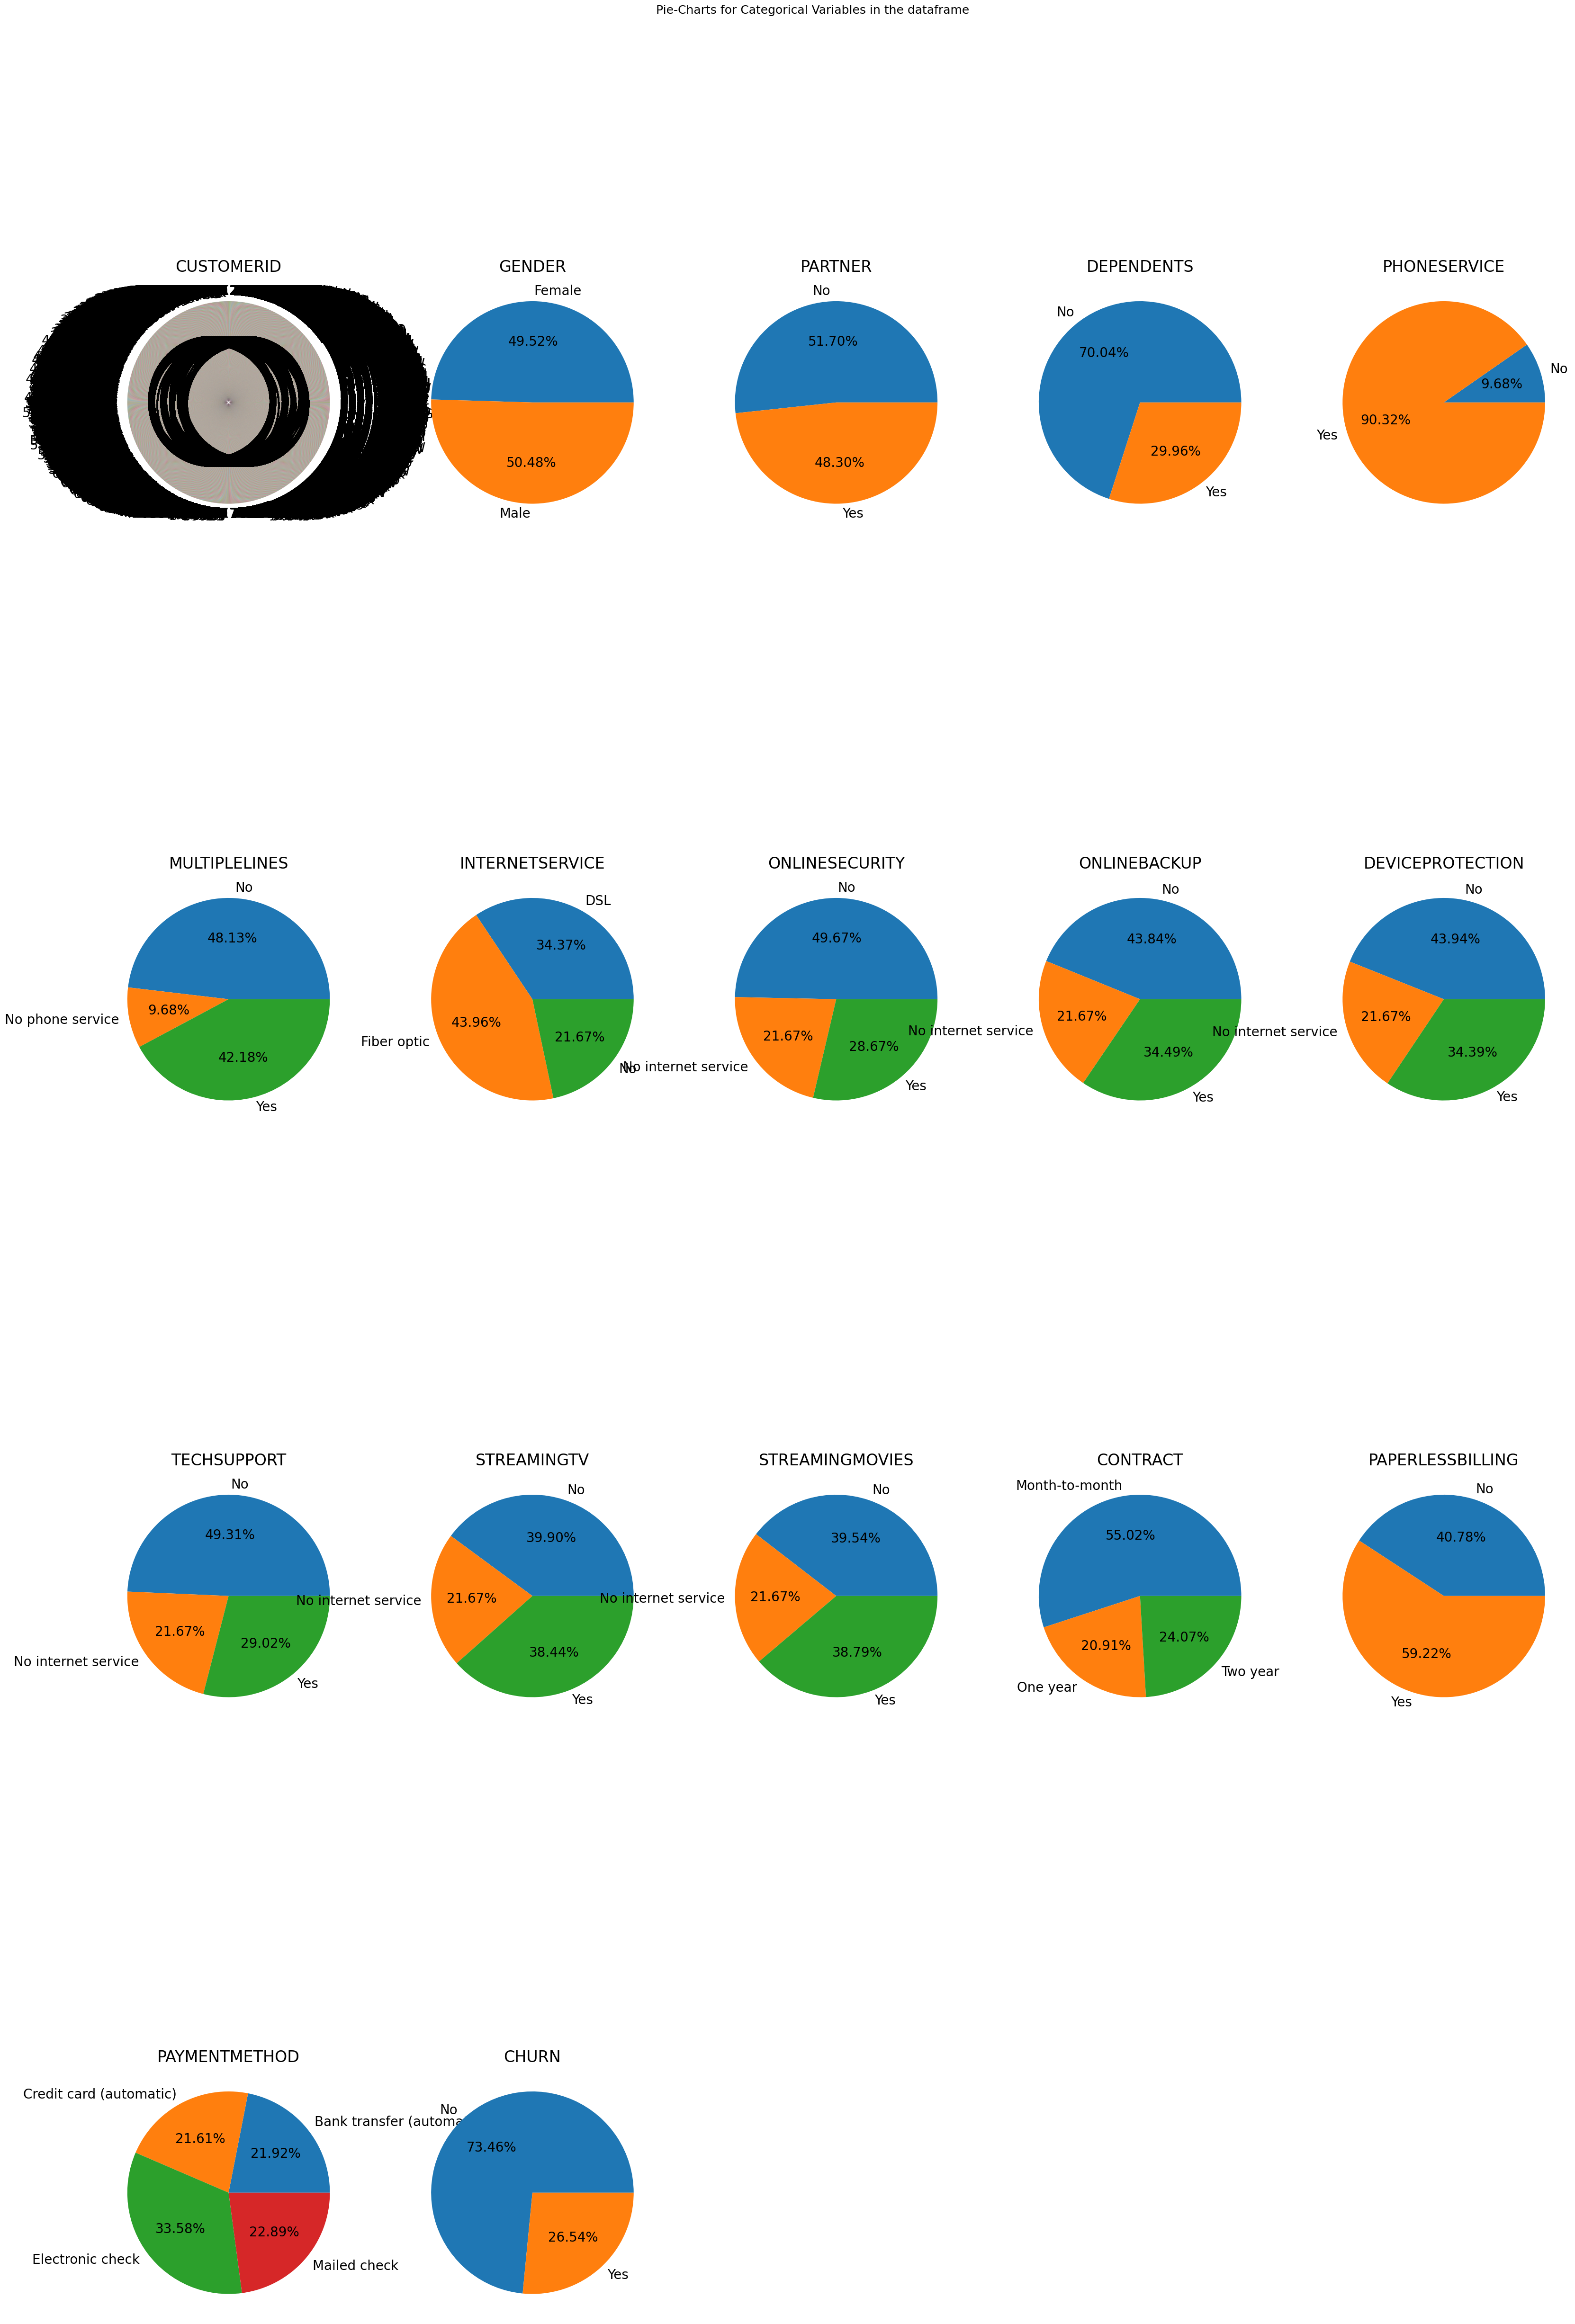

In [ ]:
pie_charts_for_CategoricalVariable(telecom_churn_final, 5)

# Insights from above pie chart

### Pie charts have been plotted for all the below categorical variables:
'customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'

From the Gender pie chart we can infer that 49.52% of customers belong to Female category and 50.48% belong to Male gender category. <br />
51.7% of Customers have No partners and 70.04% of customers have No dependents. <br />
90.32% of Customer have a phone service of which 42.18% have multiple lines. Fiber optic is the most popular category of Internet Service comprising of 43.96%. <br />
49.67% of Customers have No Online security and 43.84% of them have No Online Backup. 43.94% of customers have No Device Protection. <br />
29.02% have tech support and 49.31% have no tech support. 38.44% have streaming TV and 38.79% stream movies. <br />
Majority (55.02%) of customers are on a month-to-month contract. <br />
59.22% customers have opted for paperless billing. <br />
Electronic check (33.58%) has been the most popular payment method, followed by Mailed check (22.89%), followed by Bank Transfer automatic (21.92%) with Credit card automatic payment (21.61%) being the last choice of payment method.<br />
Churn % is a minority of 26.54%.

# Encode all the appropriate Categorical features with the best suitable approach.

In [ ]:
telecom_churn_final.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Let's do one hot encoding of all the categorical variables

In [ ]:
telecom_churn_one_hot = pd.get_dummies(telecom_churn_final, prefix = 'IntService', columns = ['InternetService'])
telecom_churn_one_hot = pd.get_dummies(telecom_churn_one_hot, prefix = 'gender', columns = ['gender'])
telecom_churn_one_hot = pd.get_dummies(telecom_churn_one_hot, prefix = 'Partner', columns = ['Partner'])
telecom_churn_one_hot = pd.get_dummies(telecom_churn_one_hot, prefix = 'Dependents', columns = ['Dependents'])
telecom_churn_one_hot = pd.get_dummies(telecom_churn_one_hot, prefix = 'PhoneService', columns = ['PhoneService'])
telecom_churn_one_hot = pd.get_dummies(telecom_churn_one_hot, prefix = 'MultipleLines', columns = ['MultipleLines'])
telecom_churn_one_hot = pd.get_dummies(telecom_churn_one_hot, prefix = 'OnlineSec', columns = ['OnlineSecurity'])
telecom_churn_one_hot = pd.get_dummies(telecom_churn_one_hot, prefix = 'OnlineBckUp', columns = ['OnlineBackup'])
telecom_churn_one_hot = pd.get_dummies(telecom_churn_one_hot, prefix = 'DevProtect', columns = ['DeviceProtection'])
telecom_churn_one_hot = pd.get_dummies(telecom_churn_one_hot, prefix = 'TechSupport', columns = ['TechSupport'])
telecom_churn_one_hot = pd.get_dummies(telecom_churn_one_hot, prefix = 'StreamTV', columns = ['StreamingTV'])
telecom_churn_one_hot = pd.get_dummies(telecom_churn_one_hot, prefix = 'StreamMov', columns = ['StreamingMovies'])
telecom_churn_one_hot = pd.get_dummies(telecom_churn_one_hot, prefix = 'Contract', columns = ['Contract'])
telecom_churn_one_hot = pd.get_dummies(telecom_churn_one_hot, prefix = 'PaperlessBill', columns = ['PaperlessBilling'])
telecom_churn_one_hot = pd.get_dummies(telecom_churn_one_hot, prefix = 'PayMethod', columns = ['PaymentMethod'])


In [ ]:
replaceStruct = {"Churn": {"No": 0, "Yes": 1 }}
telecom_churn_one_hot=telecom_churn_one_hot.replace(replaceStruct)

In [ ]:
telecom_churn_one_hot.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,IntService_DSL,IntService_Fiber optic,IntService_No,gender_Female,...,StreamMov_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBill_No,PaperlessBill_Yes,PayMethod_Bank transfer (automatic),PayMethod_Credit card (automatic),PayMethod_Electronic check,PayMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## Split the data into 80% train and 20% test

In [ ]:
X = telecom_churn_one_hot.drop("Churn" , axis=1)
y = telecom_churn_one_hot.pop("Churn")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

# Normalize/Standardize the data with the best suitable approach.


MinMax scaler normalises the data using the formula (x-min)/(max-min)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scale = MinMaxScaler()
min_max_scale

MinMaxScaler()

In [ ]:
X_train = X_train.drop("customerID", axis=1)

In [ ]:
X_train.shape
X_train.dtypes

SeniorCitizen                            int64
tenure                                   int64
MonthlyCharges                         float64
TotalCharges                           float64
IntService_DSL                           uint8
IntService_Fiber optic                   uint8
IntService_No                            uint8
gender_Female                            uint8
gender_Male                              uint8
Partner_No                               uint8
Partner_Yes                              uint8
Dependents_No                            uint8
Dependents_Yes                           uint8
PhoneService_No                          uint8
PhoneService_Yes                         uint8
MultipleLines_No                         uint8
MultipleLines_No phone service           uint8
MultipleLines_Yes                        uint8
OnlineSec_No                             uint8
OnlineSec_No internet service            uint8
OnlineSec_Yes                            uint8
OnlineBckUp_N

In [ ]:
X_train = min_max_scale.fit_transform(X_train)

## Model building and performance improvement

Train a model using Decision tree and check the performance of the model on train and test data

In [ ]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

## Scoring our Decision Tree

In [ ]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))



## Visualizing the Decision Tree

In [ ]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

tree.export_graphviz outputs a .dot file. This is a text file that describes a graph structure using a specific structure. You can plot this by

1. pasting the contents of that file at  http://webgraphviz.com/ (or)
2. generate a image file using the 'dot' command (this will only work if you have graphviz installed on your machine)


In [ ]:
#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))



## Reducing over fitting (Regularization)

In [ ]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

In [ ]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_treeR.dot -o credit_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_treeR.png"))



In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

In [ ]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


#                             Ensemble Learning - Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)


In [ ]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



# Ensemble Learning - AdaBoosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)


In [ ]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



#                     Ensemble Learning - GradientBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)


In [ ]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)


In [ ]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')